In [42]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createDataLinear, createDataCircular
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[ 0.2801 -0.8769  0.    ]
 [-0.5963 -0.6489  0.    ]
 [ 0.8073  0.1845  1.    ]
 [-0.5003  0.3548  1.    ]
 [ 0.9632 -0.3428  0.    ]]


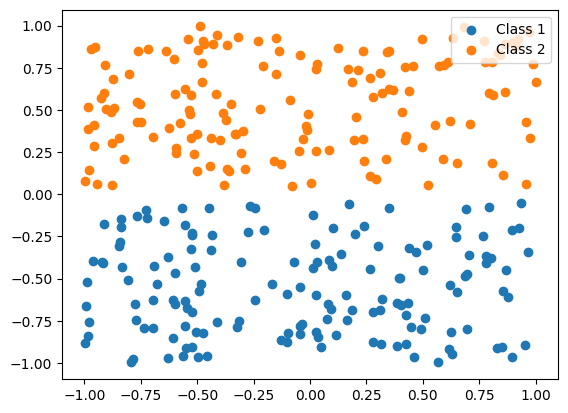

Data: [x, y, label]
 [[-0.525  -0.6319  0.    ]
 [ 0.1928  0.6376  0.    ]
 [-0.23    0.5913  0.    ]
 [ 0.1905 -0.299   1.    ]
 [ 0.2962 -0.7903  0.    ]]


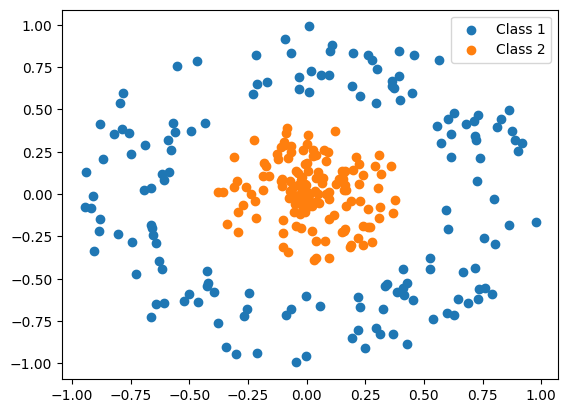

In [43]:
# linear seperable
data_linear = createDataLinear(150, 150)
print("Data: [x, y, label]\n", data_linear[0:5])

# divide into classes
class1_linear = data_linear[np.where(data_linear[:,2] == 0)]
class2_linear = data_linear[np.where(data_linear[:,2] == 1)]

plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1")
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# not linear seperable
data_circular = createDataCircular(150, 150)
print("Data: [x, y, label]\n", data_circular[0:5])

# divide into classes
class1_circular = data_circular[np.where(data_circular[:,2] == 0)]
class2_circular = data_circular[np.where(data_circular[:,2] == 1)]

plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1")
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [44]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [3, 3], activation = "tanh", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [15, 15], activation = "tanh", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[-0.2535  0.0737]
 [ 0.4925 -0.6761]
 [ 0.319   0.3683]]
(3, 3)
[[ 0.182   0.5432 -0.5147]
 [ 0.2636 -0.2681 -0.4997]
 [ 0.1646  0.465   0.0642]]
(1, 3)
[[-0.1453 -0.4425  0.1806]]

Second network weights, used on the circular data:
(15, 2)
[[ 0.1444 -0.1571]
 [-0.0843  0.1988]
 [ 0.2677  0.3234]
 [-0.0541 -0.381 ]
 [ 0.0396 -0.042 ]
 [-0.4557 -0.4832]
 [-0.2747 -0.0088]
 [-0.1306 -0.5971]
 [ 0.135  -0.6259]
 [-0.0151 -0.0937]
 [ 0.1929 -0.4902]
 [-0.4317  0.608 ]
 [ 0.4289  0.2742]
 [-0.05   -0.3249]
 [-0.1068  0.2205]]
(15, 15)
[[-0.0401  0.1697  0.09    0.1615 -0.0187  0.0172 -0.1114 -0.2375  0.149
  -0.1643 -0.0573  0.0727  0.0916 -0.178  -0.2157]
 [-0.0227  0.1952 -0.162   0.2104 -0.2309 -0.1039 -0.1855  0.1204  0.2241
  -0.1851  0.191  -0.1766  0.2175 -0.2261 -0.193 ]
 [-0.21   -0.0631  0.1532 -0.0622  0.059   0.2541  0.101  -0.0976 -0.09
   0.1789  0.1483  0.1428 -0.0806 -0.2425  0.035 ]
 [ 0.1409  0.0426  0.0125 -0.227  -0

### Quick forward call

In [45]:
input = data_linear[0][0:2]
target = data_linear[0][2]
print("Input:", input, "- Label:", data_linear[0][2])
output = nn_lin.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], target)
print("BCEloss gives:", loss)

Input: [ 0.2801 -0.8769] - Label: 0.0
Model output: 0.5066341207909133
BCEloss gives: 0.7065042316983308


### Train network on the two classes

In [46]:
# FOR LINEAR DATA
nr_epochs = 20
learning_rate = 0.01
running_loss = 0
loss_linear = []

# training loop (stochastic gradient descent)
for epoch in range(nr_epochs):
    for i in range(data_linear.shape[0]):
        # input
        input = data_linear[i][0:2]
        label = data_linear[i][2]
        
        # forward
        output = nn_lin.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_lin.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_lin.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_linear.append(running_loss / data_linear.shape[0])
    running_loss = 0

# FOR CIRCULAR DATA (gradient descent)
nr_epochs = 3000
learning_rate = 0.005
running_loss = 0
loss_circular = []

# training loop
for epoch in range(nr_epochs):
    for j in range(data_circular.shape[0]):
        # input
        input = data_circular[j][0:2]
        label = data_circular[j][2]
        
        # forward
        output = nn_circ.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_circ.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_circ.step(learning_rate)
        
        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_circular.append(running_loss / data_circular.shape[0])
    running_loss = 0

KeyboardInterrupt: 

### Weights after training


In [ ]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [3, 3, 3], activation = "tanh", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [15, 15], activation = "tanh", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[ 0.0212 -0.1905]
 [ 0.6776 -0.4873]
 [-0.1697 -0.6946]]
(3, 3)
[[ 0.5263 -0.0349  0.5074]
 [ 0.5072  0.128   0.532 ]
 [-0.4136 -0.3891  0.3806]]
(3, 3)
[[ 0.3735  0.5103  0.1032]
 [-0.1907  0.2775 -0.1294]
 [-0.3906  0.1135 -0.1297]]
(1, 3)
[[0.3648 0.1036 0.0654]]

Second network weights, used on the circular data:
(15, 2)
[[ 0.1596 -0.5558]
 [ 0.1032  0.6474]
 [ 0.2485  0.6451]
 [ 0.1871 -0.5903]
 [ 0.4538  0.7071]
 [-0.2689  0.3074]
 [-0.4582 -0.3088]
 [ 0.0432 -0.0494]
 [-0.6175 -0.4116]
 [ 0.4523 -0.2291]
 [ 0.0345 -0.1062]
 [ 0.7002 -0.622 ]
 [-0.2447  0.0651]
 [-0.0056  0.2308]
 [ 0.4142 -0.3779]]
(15, 15)
[[ 0.2405 -0.2174  0.248  -0.2066  0.1956  0.0128  0.2582  0.2224 -0.1671
  -0.0152  0.1378 -0.04    0.2352 -0.1706 -0.1748]
 [ 0.1636  0.2329  0.0998  0.2358  0.2486 -0.0865  0.0807  0.1312 -0.0732
   0.1071  0.2409 -0.0075 -0.0445  0.02    0.2092]
 [ 0.1207  0.136   0.0454  0.1605 -0.1616  0.1714  0.1018 -0.212  -0.114

### Loss graphs

lin [0.6937319994526767, 0.5927027007448359, 0.29217549115383185, 0.08738019275791052, 0.026651536510546147, 0.00905457205814972, 0.003216166767974939, 0.0011505214090720322, 0.0004120596027511535, 0.00014762311899575492, 5.289195197058089e-05, 1.8951308869623216e-05, 6.790378453197342e-06, 2.4330475512548367e-06, 8.717819556417657e-07, 3.1236717619859536e-07, 1.1192394055382137e-07, 4.0103346122585364e-08, 1.4369386303813927e-08, 5.148679127081911e-09]


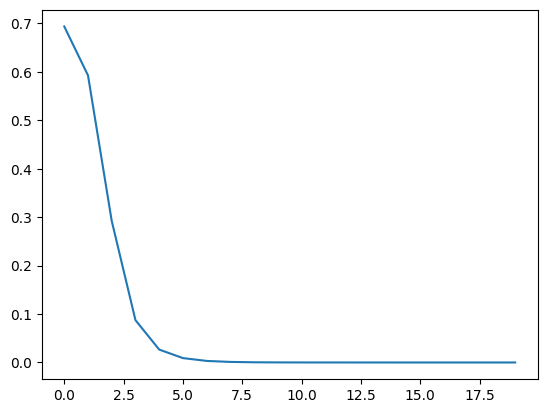

circ: [0.6928240975382385, 0.6913582711888893, 0.690112530004505, 0.6890382251933823, 0.6881409412709513, 0.687438461593996, 0.6869331392453194, 0.6866020511665205, 0.6864043249828086, 0.686295681838445, 0.6862395023185845, 0.6862106492379118, 0.6861941520293536, 0.6861821013245936, 0.6861707936510866, 0.6861587606274654, 0.6861456065237126, 0.6861313918109496, 0.686116333518342, 0.6861006724509112, 0.6860846219711338, 0.6860683538309806, 0.6860519992620008, 0.6860356552692761, 0.6860193918177693, 0.6860032582756967, 0.6859872886582878, 0.6859715056914776, 0.6859559238761485, 0.6859405517618193, 0.6859253936173015, 0.6859104506506283, 0.6858957218959907, 0.6858812048562065, 0.6858668959662424, 0.6858527909258729, 0.6858388849365932, 0.6858251728684253, 0.6858116493752998, 0.6857983089727074, 0.6857851460876593, 0.6857721550883893, 0.6857593302992845, 0.6857466660052015, 0.6857341564482731, 0.6857217958196086, 0.6857095782477475, 0.6856974977853398, 0.6856855483952272, 0.685673723936883

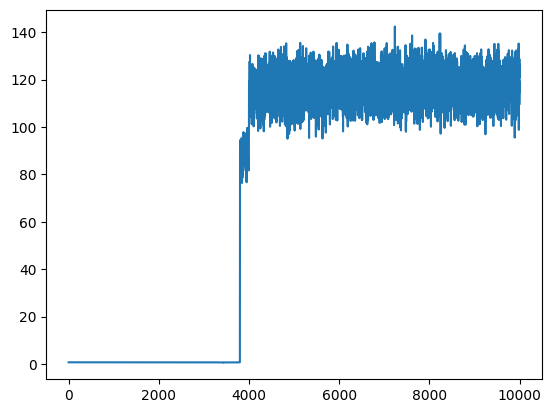

In [ ]:
print("lin", loss_linear)
plt.plot(loss_linear)
plt.show()

print("circ:", loss_circular)
plt.plot(loss_circular)
plt.show()

### Decision boundary

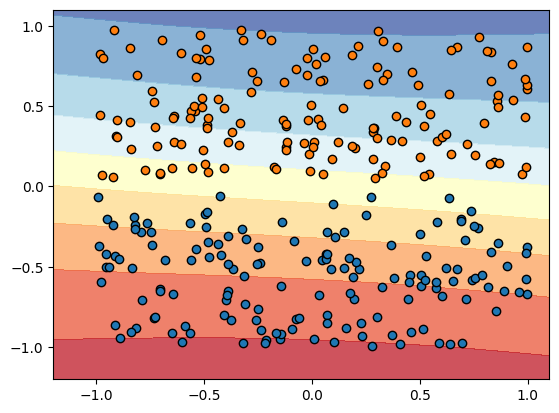

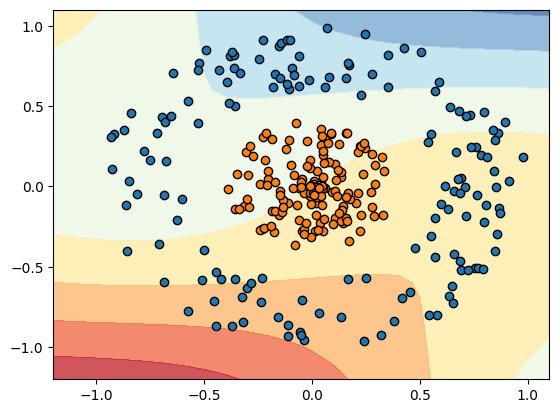

In [ ]:
# define x and y scale
x1grid = np.arange(-1.2, 1.2, 0.1)
x2grid = np.arange(-1.2, 1.2, 0.1)

# create grid lines 
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
preds_lin = []
preds_circ = []
for i in range(grid.shape[0]):
    pred_lin = nn_lin.forward(grid[i]) 
    preds_lin.append(pred_lin)
    pred_circ = nn_circ.forward(grid[i]) 
    preds_circ.append(pred_circ)

# reshape the predictions back into a grid
preds_lin = np.array(preds_lin)
preds_circ = np.array(preds_circ)
grid_lin = preds_lin.reshape(xx.shape)
grid_circ = preds_circ.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, grid_lin, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2", edgecolors='black')
plt.show()
plt.contourf(xx, yy, grid_circ, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2", edgecolors='black')
plt.show()
